In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

# sigmoid function

In [3]:
def sig(x):
    """
    compute the sigmoid of x
    
    Note: x could be a value and array
    Because I use the function "np.exp" rather than "math.exp"
    results can be generated through "vectorization"
    """
    return 1/(1+1/np.exp(x))

Text(0.5,1,'sigmoid function')

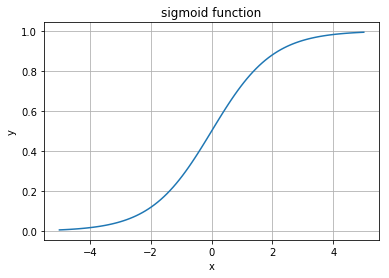

In [4]:
x=np.linspace(-5,5,100).reshape(100,1)
y=sig(x)
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.title("sigmoid function")

# the gradient of sigmoid function

$\sigma(x)=\frac{1}{1+e^{-x}}$

$\sigma'(x)=\sigma(x)(1-\sigma(x))$

In [5]:
def sig_gradient(x):
    """
    return the gradient of sigmoid function
    gradient/slope/derivative
    """
    return sig(x)*(1-sig(x))

# normalization

it converges faster after normalization

In [6]:
def normalize_rows(x):
    """
    x should be a np matrix
    """
    result=np.zeros(x.shape)
    for i in range(x.shape[0]):
        result[i]=x[i]/np.sqrt(np.sum(x[i]**2))
    return result

In [7]:
x=np.array([[1,2,6],[3,4,4]])

In [8]:
normalize_rows(x)

array([[0.15617376, 0.31234752, 0.93704257],
       [0.46852129, 0.62469505, 0.62469505]])

## np.linalg.norm

linalg=linear algebra

norm1，norm2，norm inf

In [9]:
x_norm=np.linalg.norm(x,axis=1,ord=2,keepdims=True)
y=x/x_norm
print(y)

[[0.15617376 0.31234752 0.93704257]
 [0.46852129 0.62469505 0.62469505]]


## softmax

classify two or more classes

In [10]:
def softmax(x):
    """
    x should be a matrix
    calculate the softmax of each row of x
    """
    e_x=np.exp(x)
    x_norm=np.sum(e_x,axis=1,keepdims=True)
    return e_x/x_norm

In [11]:
print(softmax([[1,1],
              [2,2],
              [3,4]]))

[[0.5        0.5       ]
 [0.5        0.5       ]
 [0.26894142 0.73105858]]


In [12]:
a=np.array([[1,2,3]])
np.multiply(a,a)

array([[1, 4, 9]])

# Loss function

## L1

In [13]:
def L1(yhat,y):
    """
    yhat : predicted labels
    y:  true labels
    """
    return np.sum(np.abs(yhat-y))

In [14]:
A=np.array([1,2,3,4])
B=np.array([0,1,2,2])
L1(A,B)

5

## L2

In [15]:
def L2(yhat,y):
#     print(np.dot(y-yhat,y-yhat))
    return np.sum((yhat-y)**2)

# cat classifier example

PIL are used here to test your model with your own picture at the end.  
h5py is a common package to interact with a dataset that is stored on an H5 file.

H5文件是层次数据格式第5代的版本（Hierarchical Data Format，HDF5），它是用于存储科学数据的一种文件格式和库文件。

H5文件在内存占用、压缩、访问速度方面都有非常优秀的特性，在工业领域和科学领域都有很多运用。

H5将文件结构简化成两个主要的对象类型：
1、数据集，就是同一类型数据的多维数组。
2、组，是一种容器结构，可以包含数据集和其他组。

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from scipy import ndimage
from lr_utils import load_dataset

## preprocess

1. get the dimensions and the shapes of the problem
2. reshape the dataset
3. standardize the dataset

### load the data

In [17]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes =load_dataset()

In [18]:
print(train_set_x_orig.shape)
print(train_set_y.shape)
print(test_set_x_orig.shape)
print(test_set_y.shape)
print(classes.shape)

(209, 64, 64, 3)
(1, 209)
(50, 64, 64, 3)
(1, 50)
(2,)


### get the original data

#### difference between reshape(-1,4) and reshape(4,-1).T

In [19]:
org=np.arange(16).reshape(4,4)
# print(d)
v1=org.reshape(-1,2)
v2=org.reshape(2,-1).T
print(org)
print(v1)
print(v2)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]]
[[ 0  8]
 [ 1  9]
 [ 2 10]
 [ 3 11]
 [ 4 12]
 [ 5 13]
 [ 6 14]
 [ 7 15]]


#### reshape the picture

In [20]:
shape=train_set_x_orig.shape
train_set_x_reshape=train_set_x_orig.reshape(shape[0],-1).T
print(train_set_x_reshape.shape)

(12288, 209)


notcie the use of reshape

In [21]:
shape=test_set_x_orig.shape
test_set_x_reshape=test_set_x_orig.reshape(shape[0],-1).T
print(test_set_x_reshape.shape)

(12288, 50)


### view a image

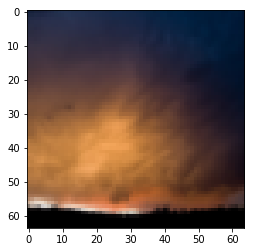

In [22]:
plt.imshow(train_set_x_reshape[:,0].reshape(64,64,3))

### the number of training image and text image, the number of pixels of an image

In [23]:
m_train=train_set_x_reshape.shape[0]
m_test=test_set_x_reshape.shape[0]
num_px=train_set_x_orig.shape[1]
print(m_train,m_test,num_px)

12288 12288 64


### view RGB channels

#### RED

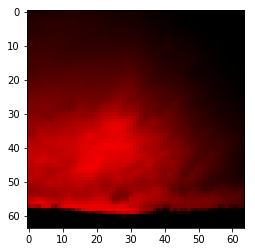

In [24]:
temp=np.zeros([64,64,3],dtype=int)
temp[:,:,0]=train_set_x_reshape[:,0].reshape(64,64,3)[:,:,0]
plt.imshow(temp)

#### GREEN

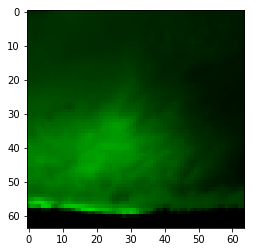

In [25]:
temp=np.zeros([64,64,3],dtype=int)
temp[:,:,1]=train_set_x_reshape[:,0].reshape(64,64,3)[:,:,1]
plt.imshow(temp)

#### BLUE

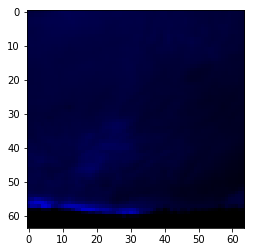

In [26]:
temp=np.zeros([64,64,3],dtype=int)
temp[:,:,2]=train_set_x_reshape[:,0].reshape(64,64,3)[:,:,2]
plt.imshow(temp)

### standardizaiton

commonly, we can subtract the mean value of the data, they divide them with their standard deviation.  
However, the max value of a picture is 255, so it's more convenient to divide them with 255

In [27]:
train_set_x=train_set_x_reshape/255
test_set_x=test_set_x_reshape/255

## main structure

### initialize hyper parameters

In [28]:
def init_parameter(dim):
    """
    Initialize hyper parameters w and b
    
    Araguments;
    dim -- size of w = number of rows of X
    
    
    Returns:
    w -- shape=(dim,1)
    b -- initialized scalar(python broadcasting)

    
    """
    w=np.zeros((dim,1))
    b=0
    return w,b

### propogate: get grads and cost

In [29]:
def propogate(X,Y,w,b):
    """
    Parameters:
    X -- shape(X)=(dim,m)   
    Y -- shape(Y)=(1,m)
    w -- shape(w)=(dim,1)
    b -- scalar
    
    Returns:
    grads:
        dw -- gradient of loss with respect to w
        db -- gradient of loss with respect to b
    cost -- J using cross entropy
    
    """
    dim=X.shape[0]
    m=X.shape[1]
    Z=np.dot(w.T,X)+b
    assert(Z.shape==(1,m))
    A=sig(Z)
    assert(A.shape==(1,m))
    cost=-1/m*(np.dot(Y,np.log(A.T))+np.dot((1-Y),np.log(1-A.T)))
    dz=A-Y
    assert(dz.shape==(1,m))
    dw=1/m*np.dot(X,dz.T)
    assert(dw.shape==(dim,1))
    db=1/m*np.sum(dz)
    assert(isinstance(db,np.float))
    
    grads={"dw":dw,'db':db}
    return grads,cost

### optimize

In [81]:
def optimize(X,Y,w,b, learning_rate,num_iterations,print_cost=False):
    """
    gradient descent
    
    Parameters:
    
    X -- shape(X)=(dim,m)
    Y -- shape(Y)=(1,m)
    w -- shape(w)=(dim,1)
    b -- scalar
    num_iterations -- number of iterations
    print_cost
    
    Returns:
    
    params:
        w
        b
    grads:
        dw
        db
    costs
    """
    costs=[]
    for i in range(num_iterations):
        grads,cost=propogate(X,Y,w,b)
        dw=grads['dw']
        db=grads['db']
        w=w-learning_rate*dw
        b=b-learning_rate*db
        
        if i%100==0:
            costs.append(cost)
        if i%100==0 and print_cost==True:
            print("Cost after iteration %i is %f " % (i,cost))
            
    params={'w':w,
            'b':b}
    grads={'dw':dw,
           'db':db}
    return params,grads,costs

#### test

In [31]:
X=np.array([[0.21,0.62,0.31],[0.432,0.4,0.5],[0.2,0.51,0.11]],dtype=float)
Y=np.array([[0,1,0]],dtype=float)
w=np.array([[0.2],[0.2],[0.3]],dtype=float)
b=0.0
params,grads,costs=optimize(X,Y,w,b,0.001,1000,print_cost=True)

Cost after iteration 0 is 0.705888 
Cost after iteration 100 is 0.699521 
Cost after iteration 200 is 0.693514 
Cost after iteration 300 is 0.687842 
Cost after iteration 400 is 0.682485 
Cost after iteration 500 is 0.677421 
Cost after iteration 600 is 0.672631 
Cost after iteration 700 is 0.668096 
Cost after iteration 800 is 0.663801 
Cost after iteration 900 is 0.659727 


### predict

In [90]:
def predict(w,b,X):
    """
    Parameters:
    w -- shape(w)=(1,dim)
    b -- scalar
    X -- shape(X)=(dim,num_test)
    
    Returns:
    Y_prediction 
    
    """
    m=X.shape[1]
    Y_prediction=np.zeros((1,m))
    w=w.reshape(X.shape[0],1)
    A=sig(np.dot(w.T,X)+b)
    for i in range(X.shape[1]):
        if A[0][i]<=0.5:
            A[0][i]=0
        else:
            A[0][i]=1
    Y_prediction=A
    return Y_prediction

### model

In [118]:
def model(X_train,Y_train,X_test,Y_test,learning_rate,num_iterations=2000,print_cost=False):
    """
    
    Returns:
    d
        Y_prediction_test
        Y_prediction_train
        w
        b
        learning_rate
        num_iterations
    """
    w,b=init_parameter(X_train.shape[0])
    params,grads,costs=optimize(X_train,Y_train,w,b,learning_rate,num_iterations,print_cost)
    w=params['w']
    b=params['b']
    
    Y_prediction_train=predict(w,b,X_train)
    train_accuracy=1-np.sum(np.abs(Y_prediction_train-Y_train),axis=1)[0]/Y_train.shape[1]
    
    Y_prediction_test=predict(w,b,X_test)
    test_accuracy=1-np.sum(np.abs(Y_prediction_test-Y_test),axis=1)[0]/Y_test.shape[1]
    
    print('training accuracy: {}%'.format(train_accuracy*100))
    print('test accuracy: {}%'.format(test_accuracy*100))
    
    d={"costs":costs,
       "Y_prediction_test":Y_prediction_test,
       "Y_prediction_train":Y_prediction_train,
       'w':w,
       'b':b,
       'learning_rate':learning_rate,
       'num_iterations':num_iterations}
    return d
    
    

In [219]:
d=model(train_set_x,train_set_y,test_set_x,test_set_y,learning_rate=0.005,num_iterations=2000,print_cost=True)

Cost after iteration 0 is 0.693147 
Cost after iteration 100 is 0.584508 
Cost after iteration 200 is 0.466949 
Cost after iteration 300 is 0.376007 
Cost after iteration 400 is 0.331463 
Cost after iteration 500 is 0.303273 
Cost after iteration 600 is 0.279880 
Cost after iteration 700 is 0.260042 
Cost after iteration 800 is 0.242941 
Cost after iteration 900 is 0.228004 
Cost after iteration 1000 is 0.214820 
Cost after iteration 1100 is 0.203078 
Cost after iteration 1200 is 0.192544 
Cost after iteration 1300 is 0.183033 
Cost after iteration 1400 is 0.174399 
Cost after iteration 1500 is 0.166521 
Cost after iteration 1600 is 0.159305 
Cost after iteration 1700 is 0.152667 
Cost after iteration 1800 is 0.146542 
Cost after iteration 1900 is 0.140872 
training accuracy: 99.04306220095694%
test accuracy: 70.0%


## check the model

### cost

Text(0.5,1,'learning rate=0.005')

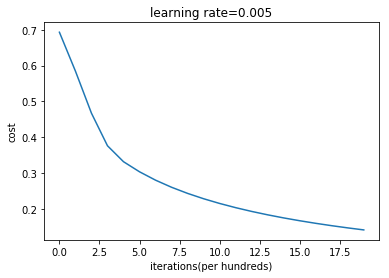

In [132]:
costs=np.squeeze(d['costs'])
plt.plot(costs)
plt.xlabel('iterations(per hundreds)')
plt.ylabel('cost')
plt.title('learning rate=0.005')

### overfitting

As the number of iterations goes up  
Although the training accuracy goes up, the test accuracy goes down.

In [136]:
d=model(train_set_x,train_set_y,test_set_x,test_set_y,learning_rate=0.005,num_iterations=2500,print_cost=True)

Cost after iteration 0 is 0.693147 
Cost after iteration 100 is 0.584508 
Cost after iteration 200 is 0.466949 
Cost after iteration 300 is 0.376007 
Cost after iteration 400 is 0.331463 
Cost after iteration 500 is 0.303273 
Cost after iteration 600 is 0.279880 
Cost after iteration 700 is 0.260042 
Cost after iteration 800 is 0.242941 
Cost after iteration 900 is 0.228004 
Cost after iteration 1000 is 0.214820 
Cost after iteration 1100 is 0.203078 
Cost after iteration 1200 is 0.192544 
Cost after iteration 1300 is 0.183033 
Cost after iteration 1400 is 0.174399 
Cost after iteration 1500 is 0.166521 
Cost after iteration 1600 is 0.159305 
Cost after iteration 1700 is 0.152667 
Cost after iteration 1800 is 0.146542 
Cost after iteration 1900 is 0.140872 
Cost after iteration 2000 is 0.135608 
Cost after iteration 2100 is 0.130708 
Cost after iteration 2200 is 0.126137 
Cost after iteration 2300 is 0.121861 
Cost after iteration 2400 is 0.117855 
training accuracy: 99.52153110047847%

### compare different learning rates

In [148]:
%matplotlib inline

learning rate is :0.01
Cost after iteration 0 is 0.693147 
Cost after iteration 100 is 0.823921 
Cost after iteration 200 is 0.418944 
Cost after iteration 300 is 0.617350 
Cost after iteration 400 is 0.522116 
Cost after iteration 500 is 0.387709 
Cost after iteration 600 is 0.236254 
Cost after iteration 700 is 0.154222 
Cost after iteration 800 is 0.135328 
Cost after iteration 900 is 0.124971 
Cost after iteration 1000 is 0.116478 
Cost after iteration 1100 is 0.109193 
Cost after iteration 1200 is 0.102804 
Cost after iteration 1300 is 0.097130 
Cost after iteration 1400 is 0.092043 
training accuracy: 99.52153110047847%
test accuracy: 68.0%
-------------------------------------------------
learning rate is :0.005
Cost after iteration 0 is 0.693147 
Cost after iteration 100 is 0.584508 
Cost after iteration 200 is 0.466949 
Cost after iteration 300 is 0.376007 
Cost after iteration 400 is 0.331463 
Cost after iteration 500 is 0.303273 
Cost after iteration 600 is 0.279880 
Cost af

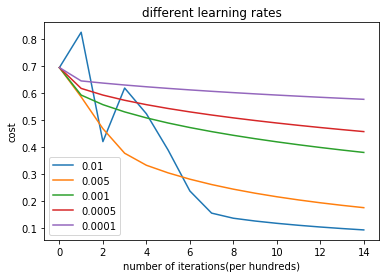

In [154]:
learning_rate=[0.01,0.005,0.001,0.0005,0.0001]

all_costs={}
for lr in learning_rate:
    print('learning rate is :{}'.format(lr))
    d=model(train_set_x,train_set_y,test_set_x,test_set_y,learning_rate=lr,num_iterations=1500,print_cost=True)
    all_costs[lr]=np.squeeze(d['costs'])
    print('-------------------------------------------------')

plt.xlabel('number of iterations(per hundreds)')
plt.ylabel('cost')
plt.title('different learning rates')

for lr,value in all_costs.items():
    plt.plot(value,label=lr)
    
plt.legend()


    
    

## test with my own picture

In [276]:
%matplotlib inline

In [283]:
import cv2
def test_cat(pic_name):
    my_pic=pic_name
    image=imread(my_pic)
    print('1. original picture')
    fig1,axis1=plt.subplots()
    axis1.imshow(image)
    print('the shape of my image is:',image.shape)
    #resize the picture
    preprocessed_image=cv2.resize(image, (64, 64))
    # cv2.imshow('unknown picture',preprocessed_image)
    # cv2.waitKey(0)
    print('2. the resized picture')
    fig2,axis2=plt.subplots()
    axis2.imshow(preprocessed_image)
    print('the shape of preprocessed image is:',preprocessed_image.shape)
    X=preprocessed_image.reshape(64*64*3,-1)
    w=d['w']
    b=d['b']
    result=predict(w,b,X)
    print(np.squeeze(result))

1. original picture
the shape of my image is: (567, 640, 3)
2. the resized picture
the shape of preprocessed image is: (64, 64, 3)
0.0


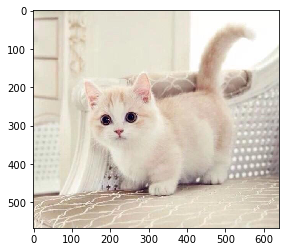

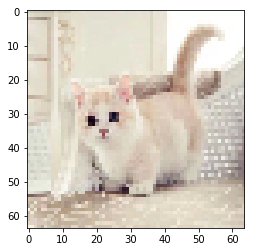

In [284]:
test_cat('cat1.jpg')

1. original picture
the shape of my image is: (1000, 778, 3)
2. the resized picture
the shape of preprocessed image is: (64, 64, 3)
0.0


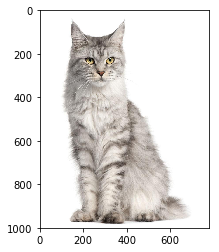

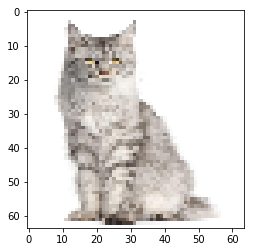

In [285]:
test_cat('cat2.jpg')